In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
df = pd.read_csv('Online Retail2.csv')

#### 數據集資訊
- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

InvoiceNo中，C開頭的訂單編號代表退貨訂單，沒有C開頭是成交訂單，因此會有兩大類訂單要分開分析

StockCode，用以分別不同商品的唯一代碼

Quantity，每筆交易的每個產品的數量

In [277]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011/12/9 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011/12/9 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011/12/9 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011/12/9 12:50,4.15,12680.0,France


In [278]:
print(df.columns)
print(len(df.columns))

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
8


In [279]:
print(df.shape)
print(df.size)

(541909, 8)
4335272


In [280]:
print('缺失值',df.isna().sum())
print('Description資料完整度=%.3f%%'%(df['Description'].count()/541909))
print('CustomerID資料完整度=%.3f%%'%(df['CustomerID'].count()/541909))

缺失值 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Description資料完整度=0.997%
CustomerID資料完整度=0.751%


In [281]:
df['CustomerID'].count() + 135080

541909

In [282]:
# 檢驗計算是否正確
print(df['CustomerID'].count() + df['CustomerID'].isna().sum())
print(df['Description'].count() + df['Description'].isna().sum())


541909
541909


In [283]:
# from datetime import datetime

# dateFormatter = '%Y/%M/%D %H:%M'
# datetime.strptime(df['InvoiceDate'],dateFormatter)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [284]:
print(df['CustomerID'])

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64


In [285]:
for i in df:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


#### 資料檢閱
- 該零售數據有8個欄位、541,909筆資料
- 整體資料量 4,335,272
##### 欄位類別
    - InvoiceNo:訂單號碼 - StockCode:商品編號 - Description:商品描述
    - Quantity:數量 - InvoiceDate:下單日期 - UnitPrice:商品單價
    - CustomerID:客戶編號 - Country:國家
##### 缺失值
    - Description/商品描述 有1454筆缺失  資料完整度=0.997%
    - CustomerID/客戶編號 有135080筆缺失 資料完整度=0.751%
    - 其餘資料無缺失值


In [286]:
import datetime
print('最初時間',df['InvoiceDate'].max())
print('最後時間',df['InvoiceDate'].min())
print('時間差',(df['InvoiceDate'].max())-(df['InvoiceDate'].min()))

最初時間 2011-12-09 12:50:00
最後時間 2010-12-01 08:26:00
時間差 373 days 04:24:00


統計時間從2010-12-01 到 2011-12-09 共373天


In [287]:
df.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [288]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [289]:
df['Quantity'].nsmallest(50) # 對Quantity(數量)取前50最小的值

540422   -80995
61624    -74215
225529    -9600
225530    -9600
4287      -9360
225528    -9058
115818    -5368
431381    -4830
341601    -3667
323458    -3167
160145    -3114
263884    -3100
113580    -3000
375429    -2880
270886    -2834
431378    -2618
50849     -2600
131399    -2472
185113    -2376
431379    -2003
160144    -2000
160143    -1930
323469    -1897
242906    -1681
431376    -1671
445127    -1560
224419    -1515
174654    -1512
472841    -1510
151033    -1479
229728    -1440
234739    -1440
234740    -1440
234764    -1440
234765    -1440
375427    -1440
375428    -1440
82794     -1430
65063     -1400
187609    -1350
160142    -1300
203752    -1300
203761    -1300
390544    -1296
390548    -1296
445128    -1284
115505    -1277
221186    -1206
114539    -1200
377448    -1200
Name: Quantity, dtype: int64

In [290]:
df['UnitPrice'].nsmallest(20) # 對UnitPrice(單價)取前20最小的值

299983   -11062.06
299984   -11062.06
622           0.00
1970          0.00
1971          0.00
1972          0.00
1987          0.00
1988          0.00
2024          0.00
2025          0.00
2026          0.00
2406          0.00
4347          0.00
4348          0.00
6391          0.00
6392          0.00
7187          0.00
7188          0.00
7189          0.00
7190          0.00
Name: UnitPrice, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='InvoiceDate', ylabel='UnitPrice'>

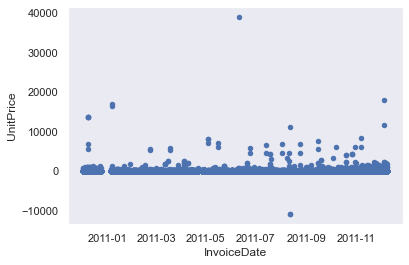

In [291]:
df.plot(x='InvoiceDate',y='UnitPrice',kind='scatter') # 觀察所有交易單價的分布狀況

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='InvoiceDate', ylabel='Quantity'>

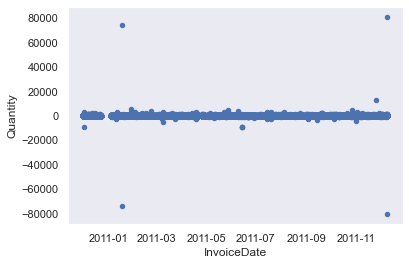

In [292]:
df.plot(x='InvoiceDate',y='Quantity',kind='scatter') # 觀察所有交易數量的分布狀況

根據對數值資料的簡單統計發現，Quantity(數量)以及UnitPrice(單價)都有負數的值

Quantity 取最小值到50筆都還是負數，負數資料應該不少

UnitPrice 取最小值到20筆僅有前兩筆為負數不過，分別為索引第 299983、299984 其餘皆為 0

另外Quantity中最大值 80995 而最小值 -80995 ，需要進一步解析Quantity最大與最小值資料兩者關係

初步分析方向為解析這些欄位中的正、負數分布以及涵義

已經知道InvoiceID中開頭為'C'的訂單編號是退貨訂單，所以Quantity為負數應該就是那些訂單編號開頭為'C'的退貨訂單，接下來會進一步檢驗是否所有開頭為'C'的InvoiceID的Quantity都是負數，沒有被誤植且對統計造成偏差的資料



In [293]:
# 使用單價-UnitPrice與數量-Quantity欄位計算利潤-Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
print(df['Revenue'])
print(df['Revenue'].describe())
print('df[\'Revenue\']的型態',(df['Revenue'].dtype))

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 541909, dtype: float64
count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: Revenue, dtype: float64
df['Revenue']的型態 float64


In [294]:
# 拆分正利潤與負利潤交易
surplus = (df['Revenue'] > 0)
Positive_Revenue = df[surplus]
print('Revenue大於0的交易筆數{}'.format(Positive_Revenue['Revenue'].count()))

deficit = (df['Revenue'] < 0)
Negative_Revenue = df[deficit]
print('Revenue小於0的交易筆數{}'.format(Negative_Revenue['Revenue'].count()))

print('整等體筆數541909減去大於0以及小於0的交易筆數=',541909 - (530104 + 9290))
# 應該還有2515筆交易利潤於 0

# 找出零利潤交易
Zero = (df['Revenue'] == 0)
Zero_Revenue = df[Zero]
print('Revenue等於0的交易筆數{}'.format(Zero_Revenue['Revenue'].count()))
print('驗算',Positive_Revenue['Revenue'].count() + 
        Negative_Revenue['Revenue'].count() +
        Zero_Revenue['Revenue'].count())

Revenue大於0的交易筆數530100
Revenue小於0的交易筆數9290
整等體筆數541909減去大於0以及小於0的交易筆數= 2515
Revenue等於0的交易筆數2519
驗算 541909


In [295]:
print('正收益總額%.2f'%Positive_Revenue['Revenue'].sum())
print('負收益總額%.2f'%Negative_Revenue['Revenue'].sum())
print('兩者相差%.2f'%(Positive_Revenue['Revenue'].sum() + Negative_Revenue['Revenue'].sum()))
print('負收益正收益比率%.2f'%(Negative_Revenue['Revenue'].abs().sum()/Positive_Revenue['Revenue'].sum()))
print('負收益佔利潤比率%.2f'%(Negative_Revenue['Revenue'].abs().sum()/
                            (Positive_Revenue['Revenue'].sum()-Negative_Revenue['Revenue'].abs().sum())))

正收益總額10666684.54
負收益總額-918936.61
兩者相差9747747.93
負收益正收益比率0.09
負收益佔利潤比率0.09


In [296]:
df['Revenue'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: Revenue, dtype: float64

##### Revenue收益初步分析
- 正負交易筆數方面
    - 收益大於0的交易筆數為530,104筆
    - 收益小於0的交易筆數為9,290筆
    - 收益等於0的交易為2,515筆
- 正負交易總額方面(單位：英鎊)
    - 正收益的交易總額為 10,666,684.54
    - 負收益的交易總額為 -918,936.61
    - 正減去負的交易總額為 9,747,747.93，此為確實帶來利潤的交易
    - 負收益總額佔正收益總額約 9%
    - 負收益總額佔利潤總額約 9%

In [297]:
918936/9747747

0.09427163015207514

In [298]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

檢驗退貨訂單數量

In [299]:
Return_Order = df['InvoiceNo'].str.startswith('C',na=False) #! 先前檢驗InvoiceNo是沒有缺失值
#! 但是其他欄位有缺失值在此條件會出現error，因此設定na=False

print('所有退貨訂單數量=%4d'%df.loc[Return_Order,['InvoiceNo']].count()) # 計算InvoiceNo為'C'開頭代表退貨訂單的數量
print('所有退貨訂單的Quantity不小於0的數量=%4d'%(df.loc[Return_Order,['Quantity']]<0).sum()) # 檢驗是否所有退貨訂單的Quantity都小於0
print('所有退貨訂單的UnitPrice都大於0的數量=%4d'%(df.loc[Return_Order,['UnitPrice']] > 0).sum()) # 檢驗是否有退貨的訂單的UnitPrice小於or等於0的情況

所有退貨訂單數量=9288
所有退貨訂單的Quantity不小於0的數量=9288
所有退貨訂單的UnitPrice都大於0的數量=9288


確認所有InvoiceNo為'C'開頭的訂單的Quantity都小於0，以及UnitPrice都不低於0，同時確認目前Revenue欄位估算出來的值都是合理的

In [300]:
# 計算所有退貨訂單的退款總額
print('所有退貨訂單的退款總額:%.2f'%df.loc[Return_Order,['Revenue']].sum())
print('所有退貨訂單的退款總額與負收益差額:%.2f'%(Negative_Revenue['Revenue'].sum()-df.loc[Return_Order,['Revenue']].sum()).abs())
print('退貨訂單退款佔負收益的比率:%.2f'%(df.loc[Return_Order,['Revenue']].sum()/Negative_Revenue['Revenue'].sum()))

所有退貨訂單的退款總額:-896812.49
所有退貨訂單的退款總額與負收益差額:22124.12
退貨訂單退款佔負收益的比率:0.98


計算所有的退貨訂單的退款額為: 896,812.49

全部的負收益中退貨的退款額佔道: 98%

另外負收益中還有 22,124.12 的差額不確定是什麼造成

##### 對部分極值做解析

c:\Users\NiuNi\OneDrive\桌面\thu_ai\thu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


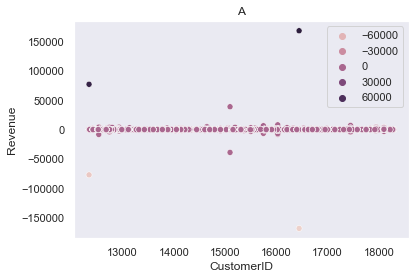

In [301]:
sns.scatterplot(df['CustomerID'],df['Revenue'],data=df,hue=df['Quantity'])
sns.set(style='dark')
plt.legend(bbox_to_anchor = (1,1))
plt.title('A')
plt.show()

以上為每個CustomerID的Revenue分布圖，較深色以及較淺色的點是在退貨or下單的Quantity較大的部分

同時，這些極值的點是正負對稱推測應該是同個客戶下單後又退貨，推測有可能下單下錯數量或是產品確實有問題，不過還是要進一步把這些點的詳細資料抓出來觀察

c:\Users\NiuNi\OneDrive\桌面\thu_ai\thu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


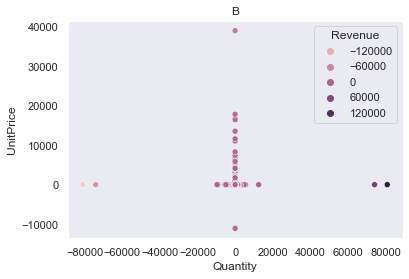

In [302]:
sns.scatterplot(df['Quantity'],df['UnitPrice'],data=df,hue='Revenue') # palette調色
sns.set(style='dark',)
plt.title('B')
plt.show()

此圖為UnitPrice和Quantity的分布圖，點的深淺代表此訂單帶來的Revenue多寡，此圖的重點在於y軸的UnitPrice，因為大部分的訂單下的Quantity分布上來看其實都不算多

所以在這裡將找出Quantity低但是UnitPrice較高的商品來進一步觀察，這些UnitPrice高的訂單的客戶是誰?買了甚麼?是否退貨率高?等等的資訊

In [303]:
Revenue_high = df['Revenue'] >= 25000
print(df[Revenue_high])

       InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
222680    556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country   Revenue  
61619  2011-01-18 10:01:00       1.04     12346.0  United Kingdom   77183.6  
222680 2011-06-10 15:28:00     649.50     15098.0  United Kingdom   38970.0  
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom  168469.6  


In [304]:
Revenue_low = df['Revenue'] <= -25000
print(df[Revenue_low])

       InvoiceNo StockCode                     Description  Quantity  \
61624    C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   
222681   C556445         M                          Manual        -1   
540422   C581484     23843     PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  UnitPrice  CustomerID         Country   Revenue  
61624  2011-01-18 10:17:00       1.04     12346.0  United Kingdom  -77183.6  
222681 2011-06-10 15:31:00   38970.00     15098.0  United Kingdom  -38970.0  
540422 2011-12-09 09:27:00       2.08     16446.0  United Kingdom -168469.6  


In [305]:
# 對筆下單與退貨時間的差別
print(df[Revenue_high]['InvoiceDate'])
print(df[Revenue_low]['InvoiceDate'])

61619    2011-01-18 10:01:00
222680   2011-06-10 15:28:00
540421   2011-12-09 09:15:00
Name: InvoiceDate, dtype: datetime64[ns]
61624    2011-01-18 10:17:00
222681   2011-06-10 15:31:00
540422   2011-12-09 09:27:00
Name: InvoiceDate, dtype: datetime64[ns]


針對圖A中的極值，找出它們的詳細資料互相比對確認為3個客戶的下單與退貨,下單同一商品除了InvoiceNo:556444/C556445的CustomerID都是15098不過在StockCode/Description/Quantity不一樣，應該key單時錯誤

另外比較兩者的InvoiceDate發現下單和退貨的時間僅僅相差幾分鐘，所以較大可能是下錯訂單所以取消，因此這些Quantity非常大或非常小的訂單應該可以刪去，因為本身就是無意義的訂單

另外再看一下這三位客戶是否有下其他訂單，交易的詳細資訊如何

In [306]:
(df[df['CustomerID']== 12346])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [307]:
(df[df['CustomerID']== 15098])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098.0,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.0
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098.0,United Kingdom,649.5
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2011-06-10 15:39:00,4.95,15098.0,United Kingdom,-297.0


In [308]:
(df[df['CustomerID']== 16446])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,1.65
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,1.25
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60


以上3名客戶，CustomerID:15098帶來649.5的利潤，CustomerID:16446則帶來2.9的利潤，另一位CustomerID:12346則為0 因此後續進一步的分析應該會將此客戶刪除

接著解析UnitPrice的極值，圖B中y軸接近40000最高的點可以忽略因為那是	InvoiceNo:C556445的取消訂單

因此這裡會逐步挑出y軸20000以下以及低於0的訂單資訊，進一步觀察是哪些Description(商品)以及哪些CustomerID

In [309]:
UnitPrice_low = df[df['UnitPrice']<0]
print(UnitPrice_low)

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country   Revenue  
299983  -11062.06         NaN  United Kingdom -11062.06  
299984  -11062.06         NaN  United Kingdom -11062.06  


In [310]:
# UnitPrice的極小值(<0)的總額
UnitPrice_low['Revenue'].sum()

-22124.12

In [359]:
UnitPrice_low['InvoiceNo']

299983    A563186
299984    A563187
Name: InvoiceNo, dtype: object

圖B中y軸低於0的那一點，根據它的完整資料是一筆在 InvoiceDate:2011-08-12登記，額度為-11062.06來自英國的兩筆壞帳(Description=Adjust bad debt)，它沒有CustomerID(NaN)，後續進一步的分析(ex.客戶、銷貨利潤等等)應該會刪除此筆

另外前面計算出的'所有退貨訂單的退款總額與負收益差額'的數字也是-22,124.12，所以所有的負收益是98%的退貨訂單的退款額+2%的壞帳總額

In [311]:
print('UnitPrice低於51的總數量',(df[df['UnitPrice']<=50]['UnitPrice']).count())
print('UnitPrice低於101的總數量',(df[df['UnitPrice']<=100]['UnitPrice']).count())
print('UnitPrice大於100的總數量',(df[df['UnitPrice']>100]['UnitPrice']).count())
print('UnitPrice大於1000的總數量',(df[df['UnitPrice']>1000]['UnitPrice']).count())
print('UnitPrice大於10000的總數量',(df[df['UnitPrice']>10000]['UnitPrice']).count())
print('UnitPrice大於20000的總數量',(df[df['UnitPrice']>20000]['UnitPrice']).count())

UnitPrice低於51的總數量 540636
UnitPrice低於101的總數量 540873
UnitPrice大於100的總數量 1036
UnitPrice大於1000的總數量 120
UnitPrice大於10000的總數量 10
UnitPrice大於20000的總數量 1


In [312]:
print((df[df['UnitPrice']<=100]['UnitPrice']).count()/df['UnitPrice'].count())
print((df[df['UnitPrice']>1000]['UnitPrice']).count()/df['UnitPrice'].count())

0.9980882399074383
0.00022143939296081076


UnitPrice在100以內的比例超過99%

UnitPrice超過1000的比例佔微乎其微

In [313]:
df['CustomerID'].isna().value_counts()

False    406829
True     135080
Name: CustomerID, dtype: int64

In [314]:
# 抓出CustomerID是空值的資料
Null_CustomerID = df[df['CustomerID'].isna()]
print(Null_CustomerID)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
622    2010-12-01 11:52:00       0.00         

抓出CustomerID為空值的135,080筆資料，這些客戶無法被識別，因此也不能斷定他們是沒加入會員的客戶或者第一次來購物的新客戶

In [315]:
# 檢查InvoiceNo的不重複的值
print(df['InvoiceNo'].value_counts())
print((df['InvoiceNo'].value_counts()).count())

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64
25900


InvoiceNo 不重複的總數量是25900筆(包含退貨)

In [316]:
print((df['InvoiceNo']=='573585').value_counts())
print(df['InvoiceNo'].count())

False    540795
True       1114
Name: InvoiceNo, dtype: int64
541909


InvoiceNo是基於訂單下訂商品與成立時間給定，因此同一訂單編號訂單都會是相同下單時間但下訂商品不同

不過InvoiceNo是有重複的情況，檢視有沒有可能InvoiceNo一樣但是CustomerID欄位卻是空值的情況

In [317]:
(df[df['InvoiceNo']=='558475']['CustomerID'].isna()).value_counts()

True    705
Name: CustomerID, dtype: int64

In [318]:
(df[df['InvoiceNo']=='558475']['CustomerID'].isna()).sum()

705

In [319]:
df[df['InvoiceNo']=='536876']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
5756,536876,21993,FLORAL FOLK STATIONERY SET,3,2010-12-03 11:36:00,2.51,NaN,United Kingdom,7.53
5757,536876,22028,PENNY FARTHING BIRTHDAY CARD,1,2010-12-03 11:36:00,0.85,NaN,United Kingdom,0.85
5758,536876,22041,"RECORD FRAME 7"" SINGLE SIZE",1,2010-12-03 11:36:00,5.06,NaN,United Kingdom,5.06
5759,536876,22042,CHRISTMAS CARD SINGING ANGEL,1,2010-12-03 11:36:00,0.43,NaN,United Kingdom,0.43
5760,536876,22059,CERAMIC STRAWBERRY DESIGN MUG,1,2010-12-03 11:36:00,3.36,NaN,United Kingdom,3.36
...,...,...,...,...,...,...,...,...,...
6344,536876,21985,PACK OF 12 HEARTS DESIGN TISSUES,1,2010-12-03 11:36:00,0.85,NaN,United Kingdom,0.85
6345,536876,21986,PACK OF 12 PINK POLKADOT TISSUES,4,2010-12-03 11:36:00,0.85,NaN,United Kingdom,3.40
6346,536876,21990,MODERN FLORAL STATIONERY SET,3,2010-12-03 11:36:00,2.51,NaN,United Kingdom,7.53
6347,536876,21991,BOHEMIAN COLLAGE STATIONERY SET,3,2010-12-03 11:36:00,2.51,NaN,United Kingdom,7.53


In [320]:
Customer_null = df['CustomerID'].isna()
print(df[Customer_null]['InvoiceNo'],df[Customer_null]['CustomerID'])

622       536414
1443      536544
1444      536544
1445      536544
1446      536544
           ...  
541536    581498
541537    581498
541538    581498
541539    581498
541540    581498
Name: InvoiceNo, Length: 135080, dtype: object 622      NaN
1443     NaN
1444     NaN
1445     NaN
1446     NaN
          ..
541536   NaN
541537   NaN
541538   NaN
541539   NaN
541540   NaN
Name: CustomerID, Length: 135080, dtype: float64


In [321]:
# df[Customer_null].fillna(0,inplace=True)

In [322]:
df[Customer_null]['CustomerID']

622      NaN
1443     NaN
1444     NaN
1445     NaN
1446     NaN
          ..
541536   NaN
541537   NaN
541538   NaN
541539   NaN
541540   NaN
Name: CustomerID, Length: 135080, dtype: float64

In [323]:
df[Customer_null]['InvoiceNo']

622       536414
1443      536544
1444      536544
1445      536544
1446      536544
           ...  
541536    581498
541537    581498
541538    581498
541539    581498
541540    581498
Name: InvoiceNo, Length: 135080, dtype: object

In [324]:
df2 = pd.merge(df[Customer_null]['InvoiceNo'],df[Customer_null]['CustomerID'],left_index=True,right_index=True)

In [325]:
df2

,InvoiceNo,CustomerID
622,536414,NaN
1443,536544,NaN
1444,536544,NaN
1445,536544,NaN
1446,536544,NaN
...,...,...
541536,581498,NaN
541537,581498,NaN
541538,581498,NaN
541539,581498,NaN


In [326]:
df3 = pd.merge(df['InvoiceNo'],df['CustomerID'],right_index=True,left_index=True)

In [327]:
df3 = df3.dropna()

In [328]:
df3

,InvoiceNo,CustomerID
0,536365,17850.0
1,536365,17850.0
2,536365,17850.0
3,536365,17850.0
4,536365,17850.0
...,...,...
541904,581587,12680.0
541905,581587,12680.0
541906,581587,12680.0
541907,581587,12680.0


In [329]:
df3['CustomerID'].isna().sum()

0

In [330]:
df4 = pd.merge(df2['InvoiceNo'],df3['InvoiceNo'],how='inner')

In [331]:
df4

,InvoiceNo


透過篩選資料後合併比對確認沒有InvoiceNo一樣但CustomerID卻是空值的資料出現

因此後續可以另外將CustomerID有無缺失的資料分開解析(做客戶方面的分析階段)

In [332]:
(df['CustomerID'].value_counts()).count()

4372

不重複的CustomerID數量是4373名

也就是有4373名客戶是確定的

In [333]:
# for all_InvoiceNo,all_InvoiceDate,all_CustomerID in zip(df['InvoiceNo'],df['InvoiceDate'],df['CustomerID']):

除了原始資料另外拆分出三筆資料檔案
- CustomerID無缺失值的資料檔案
- CustomerID有缺失值的資料檔案
- InvoiceNo開頭為C的退貨資料檔案

In [334]:
df_CustomerID_NoNull = df
print(df_CustomerID_NoNull.isna().any())
print(df_CustomerID_NoNull['CustomerID'].isna().sum())
print(df_CustomerID_NoNull['Description'].isna().sum())

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
Revenue        False
dtype: bool
135080
1454


In [335]:
df_CustomerID_NoNull.dropna(axis=0,subset=['CustomerID'],inplace=True) # 單純把CustomerID的缺失值排除掉

In [336]:
print(df_CustomerID_NoNull)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Revenue 

In [337]:
df_CustomerID_NoNull = df_CustomerID_NoNull.to_csv('Online_Retail_CustomerID_NoNull.csv')

In [338]:
df_CustomerID_Null = df['CustomerID'].isna()
df_CustomerID_Null

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: CustomerID, Length: 406829, dtype: bool

In [341]:
df = pd.read_csv('Online Retail2.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011/12/9 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011/12/9 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011/12/9 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011/12/9 12:50,4.15,12680.0,France


In [346]:
df_CustomerID_Null = df[df['CustomerID'].isna()]
df_CustomerID_Null

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010/12/1 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010/12/1 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010/12/1 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010/12/1 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010/12/1 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011/12/9 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011/12/9 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011/12/9 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011/12/9 10:26,10.79,NaN,United Kingdom


In [356]:
df_CustomerID_Null = df_CustomerID_Null.to_csv('Online_Retail_CustomerID_Null.csv')

AttributeError: 'NoneType' object has no attribute 'to_csv'

In [357]:
df_Return_InvoiceNo = df[df['InvoiceNo'].str.startswith('C')]
df_Return_InvoiceNo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010/12/1 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010/12/1 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010/12/1 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010/12/1 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010/12/1 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011/12/9 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011/12/9 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011/12/9 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011/12/9 11:58,1.25,17315.0,United Kingdom


In [358]:
df_Return_InvoiceNo = df_Return_InvoiceNo.to_csv('Online_Retail_Return_InvoiceNo.csv')